In [1]:
# COMP3330 Project 1A

# Group members: Lovekesh Singh: c, James McCulloch: 3291441, Jamey Blackman: c,
# Bradley De Domizio: c3305193, Aditya Jo: c, Hugh Masters: c

# Date: 10/05/2020
# Question: 1. b)

import csv
import tensorflow as tf
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt


def read_two_spiral_file(filename="datasets/spiralsdataset.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([float(row[-1])])

    return x, y

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

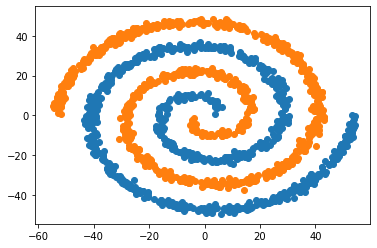

1600
800
800


In [2]:
import numpy as np
from numpy import pi

N = 800
theta = np.sqrt(np.random.rand(N))*4*pi # np.linspace(0,2*pi,100)

r_a = 4*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -4*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

# np.savetxt("result.csv", res, delimiter=",", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

x, y = read_two_spiral_file(filename="result.csv")

print(len(x))

x1 =  0 
x2 = 0
for i in y: 
    if (i[0] == 0.0):
        x1 = x1 + 1
    else: 
        x2 = x2 + 1
        
print(x1)
print(x2)

In [3]:
# Create the model
x_ = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1])

# Create first layer weights
layer_0_weights = tf.Variable(tf.random_normal([2, 40]))
layer_0_bias = tf.Variable(tf.random_normal([40]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))

# Create second layer weights
layer_1_weights = tf.Variable(tf.random_normal([40, 40]))
layer_1_bias = tf.Variable(tf.random_normal([40]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))

# Create third layer weights
layer_2_weights = tf.Variable(tf.random_normal([40, 1]))
layer_2_bias = tf.Variable(tf.random_normal([1]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Training...


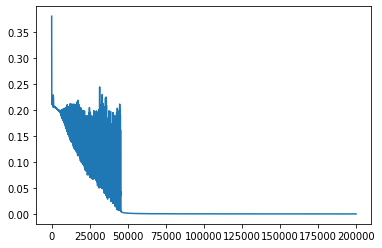

In [4]:
# Define error function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_2))

# RANDOM DATASET
# 200000 with 0.1 works well, small spiral though
# 15000 with 0.1 works as well.
# 200000 with 1 was worse
# 200000 with 0.05 would probably need more epochs

# Define optimizer and its task (minimise error function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

N_EPOCHS = 200000 

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Training...')

errors = []

# Train
for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: x, y_: y})
    errors.append(error)
    
plt.plot(errors)
plt.show()       

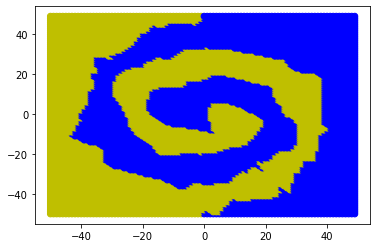

In [5]:
# Visualise activations
activation_range = arange(-100,100,1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
classifications = round(sess.run(layer_2, feed_dict={x_:coordinates}))
x, y = meshgrid(activation_range, activation_range)
plt.scatter(x, y, c=['b' if x > 0 else 'y' for x in classifications])
plt.show()